# Lab 1 - DS3010 Machine Learning
# Linear Regression and its Variants (Ridge and LASSO)

In [122]:
## The starter code was implemented in google colab , hence drive is mounted.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data and computing the basic statistics. (0.5 points)

In [123]:
## Now that we have mounted the drive, let us load the data required for
## executing the lab. The accompanying zip file should contain a data folder
## that has three csv files. We will use the train.csv file for training the
## model and evaluate it using the data in test.csv. Note that the test.csv only
## contains the values of the independent variables.

## We would need functions from the Pandas and Numpy libraries for the lab. So 
## let us import them right away.
import pandas as pd
import numpy as np

## Load the training data using the pandas frame named train_data
## Load the test data using the pandas frame named test_data_X
## Load the file that will be finally submitted after appending the predictions


train_data = pd.read_csv('/content/drive/MyDrive/w3/w3 2/data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/w3/w3 2/data/testX.csv')
submission = pd.read_csv('/content/drive/MyDrive/w3/w3 2/data/submission.csv')

## Test whether the data has been loaded correctly by printing the data.
#print(train_data)

## Write code to understand the train data statistics. Specifically output
## 1. The number of data points
## 2. The number of independent variables
## 3. The mean, minimum, and maximum values of the independent variables
## 4. The mean, minimum, and maximum values of the dependent variable
## You may find Pandas API reference https://pandas.pydata.org/docs/reference/index.html#api
## useful while writing the code.

print("The number of data points are:")
print(train_data.count())
print("The number of independent variables: 1")
print("The mean of independent variables:",train_data['X'].mean())
print("The minimum of independent variables:",train_data['X'].min())
print("The maximum of independent variables:",train_data['X'].max())
print("The mean of dependent variables:",train_data['Y'].mean())
print("The minimum of dependent variables:",train_data['Y'].min())
print("The maximum of dependent variables:",train_data['Y'].max())

The number of data points are:
X    51
Y    51
dtype: int64
The number of independent variables: 1
The mean of independent variables: -1.7415263131375004e-17
The minimum of independent variables: -5.0
The maximum of independent variables: 5.0
The mean of dependent variables: -0.3703166274509804
The minimum of dependent variables: -6.3204
The maximum of dependent variables: 4.3024


# Linear Regression (1 point)

In [124]:
## We are now ready to try regression functions from the SKLearn libraries.
## You can refer to https://scikit-learn.org/stable/modules/classes.html for the
## to understand the different functions that are available in the library.

## Our goal is to experiment with linear regression, so let us import the
## necessary library.
from sklearn.linear_model import LinearRegression

## create an instance of the linear regression model with normalize parameter 
## set to True. Describe the parameters fit_intercept and normalize. Do not
## copy paste the documentaton. Instead write it in your words.

## <add your description below>
## fit_intercept: 
"""
fit_intercept = True, makes the y intercept corresponding to the line of best fit
fit_intercept = False, makes the y intercept to be 0
"""
## normalize: 
"""
 normalize = True, Normalizes X, normalization is done by subtracting the mean and dividing by the l2-norm
 and then on this normalized X regression is performed
 normalize = False, no change in X
"""
## create an instance of the regression model

reg_model = LinearRegression(normalize=True)

## Fit the model
fitted_reg_model = reg_model.fit(train_data[['X']],train_data[['Y']])

## Compute the predictions for the training data
linear_reg_predictions_train = fitted_reg_model.predict(train_data[['X']])

## Compute the predictions for the test data
linear_reg_predictions_test = fitted_reg_model.predict(test_data[['X']])
## Appending the test predictions to the submission file.
## <add your code here>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [125]:
## Compute the mean squared error (MSE) on the training set. To estimate the MSE
## we will use the predictions on the linear regressor on the training
## data for computing the MSE. The MSE function is already implemented in 
## SKLearn library. We will just call the function by passing the correct
## arguments

from sklearn.metrics import mean_squared_error

## compute the MSE on the training data.
linear_train_MSE = mean_squared_error(train_data[['Y']],linear_reg_predictions_train)
print(linear_train_MSE)

0.7568306214998783


##Ridge Regression (1 point)

In [126]:
## We are now ready to try the first variant of linear regression - Ridge
## Regression from the SKLearn libraries.
## You can refer to https://scikit-learn.org/stable/modules/classes.html for the
## to understand the different functions that are available in the library.

## Our goal is to experiment with ridge regression, so let us import the
## necessary library.
from sklearn.linear_model import Ridge

## create an instance of the ridge regression model with normalize parameter 
## set to True. Describe the parameter alpha. Do not copy paste the documentaton. 
## Instead write it in your words.

## <add your description below>
## alpha: 
"""
Constant that adds weight to the regularizer 
In ridge regression alpha is multiplied with l2-norm of weights
if alpha is 0 then it is ordinary least square regression
"""

## you can change the value of alpha, finally pick the alpha that gave you the
## best result
alpha=1e-5

## create an instance of the regression model for the specific alpha
ridge_reg_model = Ridge(alpha=alpha, normalize=True)

## Fit the model
fitted_ridge_reg_model = ridge_reg_model.fit(train_data[['X']],train_data[['Y']])

## Compute the predictions for the training data
ridge_reg_predictions_train = fitted_ridge_reg_model.predict(train_data[['X']])


## Compute the predictions for the test data
ridge_reg_predictions_test = fitted_ridge_reg_model.predict(test_data[['X']])

## Appending the test predictions to the submission file by making a new column 
## "Y_test_ridge" 
## <add your code here>

## calculating mean squared error for ridge regression
ridge_train_MSE = mean_squared_error(train_data[['Y']],ridge_reg_predictions_train)
print(ridge_train_MSE)

0.7568306217500271


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


alpha | MSE
------|----------
1e-5 | 0.7568306217500271
1e-4 |0.7568306465102358
1e-3 |0.7568331180402508
1e-2 |0.7570758460807608
1e-1 |0.777504472322849
1 |1.382214608894742





## Lasso Regression (1 point)

In [127]:
## We are now ready to try the second variant of linear regression - LASSO
## from the SKLearn libraries.
## You can refer to https://scikit-learn.org/stable/modules/classes.html for the
## to understand the different functions that are available in the library.

## Our goal is to experiment with ridge regression, so let us import the
## necessary library.
from sklearn.linear_model import Lasso

## create an instance of the LASSO regression model with normalize parameter 
## set to True. Describe the parameter alpha. Do not copy paste the documentaton. 
## Instead write it in your words.

## <add your description below>
## alpha: 
"""
Constant that adds weight to the regularizer 
In lasso regression alpha is multiplied with l1-norm of weights
if alpha is 0 then it is ordinary least square regression
"""
## you can change the value of alpha, finally pick the alpha that gave you the
## best result.
alpha=1e-5

## create an instance of the regression model for the specific alpha
lasso_reg_model = Lasso(alpha=alpha, normalize=True)


## Fit the model
fitted_lasso_reg_model = lasso_reg_model.fit(train_data[['X']],train_data[['Y']])


## Compute the predictions for the training data
lasso_reg_predictions_train = fitted_lasso_reg_model.predict(train_data[['X']])


## Compute the predictions for the test data
lasso_reg_predictions_test = fitted_lasso_reg_model.predict(test_data[['X']])


## Appending the test predictions to the submission file by making a new column 
## "Y_test_ridge" 
## <add your code here>


## calculating mean squared error for ridge regression
lasso_train_MSE = mean_squared_error(train_data[['Y']],lasso_reg_predictions_train)
print(lasso_train_MSE)


0.7568306265998787


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


alpha | MSE
---- | ----
1e-5 | 0.7568311314998786
1e-4 | 0.7568311314998786
1e-3 | 0.7568816214998786
1e-2 | 0.7619306214998783
1e-1 | 1.2668306214998788
1 |  3.258366571079332

## Plot the data and the regressor (1 point)

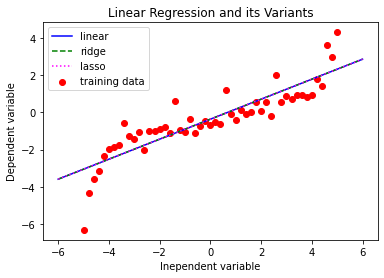

In [128]:

## We will use matplotlib to visulise the data and the fitting of the model. 
## Use the following convention
## Red colored points for training data (scatter plot)
## Blue colored line for Linear regression
## Green colored dashed line for Ridge regression
## Magenta colored dotted line for LASSO regression
## All the plots must be on a single figure.
## Add labels to x and y axis.
## Add a title to the figure - 'Linear Regression and its Variants')
## Add a legend to the figure

import matplotlib.pyplot as plt

plt.scatter(train_data[['X']], train_data[['Y']], color='red', label='training data')
plt.plot(test_data[['X']], linear_reg_predictions_test, color='blue', label='linear')
plt.plot(test_data[['X']], ridge_reg_predictions_test, color='green', linestyle='dashed', label='ridge')
plt.plot(test_data[['X']], lasso_reg_predictions_test, color='magenta', linestyle='dotted', label='lasso')
plt.legend(loc='upper left')
plt.title('Linear Regression and its Variants')
plt.xlabel('Inependent variable')
plt.ylabel('Dependent variable')
plt.show()

## Making the final submission (0.5 points)

In [119]:
## export the predictions to csv file
## <add your code here>
